In [157]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBClassifier, XGBRegressor
import matplotlib.pyplot as plt

In [158]:
df = pd.read_csv('df_feature_engineered.csv')

In [159]:
df = df.drop(columns="fiyat")   

In [160]:
list(df.select_dtypes(exclude=['object']).columns)

['km',
 'log_fiyat',
 'model_1.6 TDi BlueMotion Business',
 'model_1.6 TDi BlueMotion Comfortline',
 'model_1.6 TDi BlueMotion Elegance',
 'model_1.6 TDi BlueMotion Exclusive',
 'model_1.6 TDi BlueMotion Highline',
 'model_1.6 TDi BlueMotion Impression',
 'model_1.6 TDi BlueMotion R Line',
 'model_1.6 TDi BlueMotion Trendline',
 'arac_yasi',
 'b7_kasa',
 'yıl_2012.0',
 'yıl_2013.0',
 'yıl_2014.0',
 'yıl_2015.0',
 'yıl_2016.0',
 'yıl_2017.0',
 'yıl_2018.0',
 'yıl_2019.0',
 'yıl_2020.0',
 'vites_Otomatik',
 'vites_Yarı Otomatik',
 'yakıt_Dizel',
 'kasa_Station wagon',
 'renk_Diğer',
 'renk_Füme',
 'renk_Gri',
 'renk_Kahverengi',
 'renk_Lacivert',
 'renk_Mavi',
 'renk_Siyah',
 'kimden_Sahibinden',
 'agirlikli_hasar_skoru',
 'hepsi_orijinal']

In [161]:
X = df[list(df.select_dtypes(exclude=['object']).columns)]
X=X.drop(columns=['log_fiyat'])

In [162]:
X

,km,model_1.6 TDi BlueMotion Business,model_1.6 TDi BlueMotion Comfortline,model_1.6 TDi BlueMotion Elegance,model_1.6 TDi BlueMotion Exclusive,model_1.6 TDi BlueMotion Highline,model_1.6 TDi BlueMotion Impression,model_1.6 TDi BlueMotion R Line,model_1.6 TDi BlueMotion Trendline,arac_yasi,...,renk_Diğer,renk_Füme,renk_Gri,renk_Kahverengi,renk_Lacivert,renk_Mavi,renk_Siyah,kimden_Sahibinden,agirlikli_hasar_skoru,hepsi_orijinal
0,56500,False,False,False,False,False,True,False,False,5.0,...,False,False,False,False,False,False,False,False,106.76110,False
1,160000,True,False,False,False,False,False,False,False,6.0,...,False,False,False,False,False,False,True,False,136.64228,False
2,305000,False,True,False,False,False,False,False,False,10.0,...,False,False,False,False,False,False,False,False,102.16345,False
3,270000,False,False,False,False,True,False,False,False,8.0,...,False,False,False,False,False,False,True,False,131.57935,False
4,190000,False,False,False,False,False,False,False,True,8.0,...,False,False,False,False,False,False,False,False,139.48106,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1904,145000,False,False,False,False,False,True,False,False,7.0,...,False,False,False,False,False,False,False,True,0.00000,True
1905,197000,False,False,False,True,False,False,False,False,11.0,...,False,False,False,False,False,False,False,False,63.35373,False
1906,206000,False,True,False,False,False,False,False,False,13.0,...,False,False,False,False,False,False,False,False,101.74095,False
1907,214000,False,True,False,False,False,False,False,False,10.0,...,False,False,False,False,False,False,False,True,142.33750,False


In [163]:
"""y = df['fiyat']"""
y = df['log_fiyat']

In [164]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [165]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

# Sonuçları değerlendir
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print(f"Linear Regression: Test MSE = {mse_lr:.4f}, Test R2 = {r2_lr:.4f}")

Linear Regression: Test MSE = 0.0069, Test R2 = 0.9036


In [167]:

print("\n--- XGBoost Regressor Optimizasyonu ---")
param_grid_xgb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5],
    'colsample_bytree': [0.8, 1.0] # Her ağaçta kullanılacak sütun oranı
}

grid_search_xgb = GridSearchCV(
    estimator=XGBRegressor(random_state=42, eval_metric='rmse'), # eval_metric regresyon için rmse olmalı
    param_grid=param_grid_xgb,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=1
)

grid_search_xgb.fit(X_train, y_train)
best_xgb_model = grid_search_xgb.best_estimator_

print(f"En iyi XGBoost parametreleri: {grid_search_xgb.best_params_}")
print(f"En iyi XGBoost R2 skoru (çapraz doğrulama): {grid_search_xgb.best_score_:.4f}")

y_pred_xgb_tuned = best_xgb_model.predict(X_test)
mse_xgb_tuned = mean_squared_error(y_test, y_pred_xgb_tuned)
r2_xgb_tuned = r2_score(y_test, y_pred_xgb_tuned)
print(f"XGBoost (Ayarlanmış): Test MSE = {mse_xgb_tuned:.4f}, Test R2 = {r2_xgb_tuned:.4f}")


--- XGBoost Regressor Optimizasyonu ---
Fitting 5 folds for each of 16 candidates, totalling 80 fits


En iyi XGBoost parametreleri: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
En iyi XGBoost R2 skoru (çapraz doğrulama): 0.8911
XGBoost (Ayarlanmış): Test MSE = 0.0073, Test R2 = 0.8976


In [168]:
# Random Forest için hiperparametre aralığı
param_grid_rf = {
    'n_estimators': [100, 200, 300],  # Kullanılacak karar ağacı sayısı
    'max_depth': [10, 20, None],      # Her bir ağacın maksimum derinliği (None = sınırsız)
    'min_samples_split': [2, 5],      # Bir düğümü bölmek için gereken minimum örnek sayısı
    'min_samples_leaf': [1, 2]        # Yaprak düğümde bulunması gereken minimum örnek sayısı
}
grid_search_rf = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid_rf,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=1
)

# Modeli eğit
grid_search_rf.fit(X_train, y_train)

print("En iyi parametreler:", grid_search_rf.best_params_)
print("En iyi R2 (CV):", grid_search_rf.best_score_)

# Test seti üzerinde değerlendirme
best_rf = grid_search_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f"Test MSE: {mse_rf:.4f}, Test R2: {r2_rf:.4f}")

Fitting 5 folds for each of 36 candidates, totalling 180 fits
En iyi parametreler: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
En iyi R2 (CV): 0.8645045878006365
Test MSE: 0.0083, Test R2: 0.8837


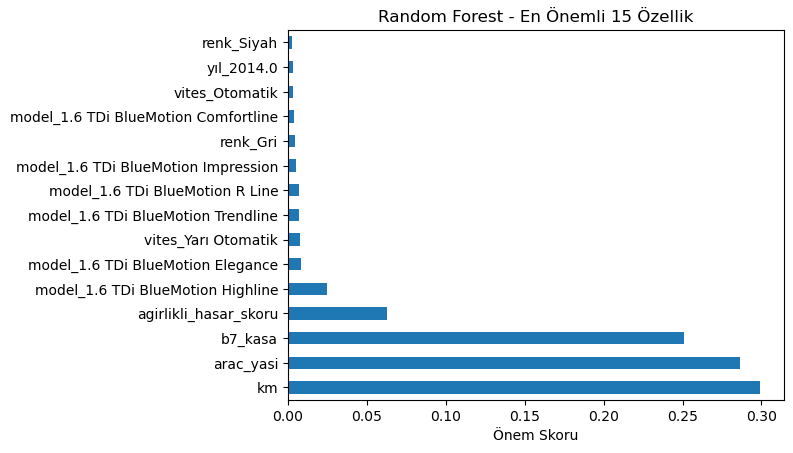

In [169]:


importances = best_rf.feature_importances_
features_rf = pd.Series(importances, index=X_train.columns)
features_rf.sort_values(ascending=False).head(15).plot(kind="barh")
plt.title("Random Forest - En Önemli 15 Özellik")
plt.xlabel("Önem Skoru")
plt.show()

In [170]:

# Gradient Boosting için hiperparametre aralığı
param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1], # Her bir ağacın katkı oranı
    'max_depth': [3, 5, 7],             # Ağacın maksimum derinliği
    'subsample': [0.8, 1.0]             # Her bir ağaç için kullanılacak örneklerin oranı
}

# GridSearchCV kurulumu
grid_search_gb = GridSearchCV(
    estimator=GradientBoostingRegressor(random_state=42),
    param_grid=param_grid_gb,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=1
)

# Eğitimi başlat
grid_search_gb.fit(X_train, y_train)

print(f"\nEn iyi Gradient Boosting parametreleri: {grid_search_gb.best_params_}")
print(f"En iyi Gradient Boosting R2 skoru (çapraz doğrulama): {grid_search_gb.best_score_:.4f}")

# En iyi model ile test seti üzerinde değerlendirme
best_gb_model = grid_search_gb.best_estimator_
y_pred_gb_tuned = best_gb_model.predict(X_test)
mse_gb_tuned = mean_squared_error(y_test, y_pred_gb_tuned)
r2_gb_tuned = r2_score(y_test, y_pred_gb_tuned)
print(f"Gradient Boosting (Ayarlanmış): Test MSE = {mse_gb_tuned:.4f}, Test R2 = {r2_gb_tuned:.4f}")

Fitting 5 folds for each of 54 candidates, totalling 270 fits

En iyi Gradient Boosting parametreleri: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 300, 'subsample': 0.8}
En iyi Gradient Boosting R2 skoru (çapraz doğrulama): 0.8921
Gradient Boosting (Ayarlanmış): Test MSE = 0.0073, Test R2 = 0.8980


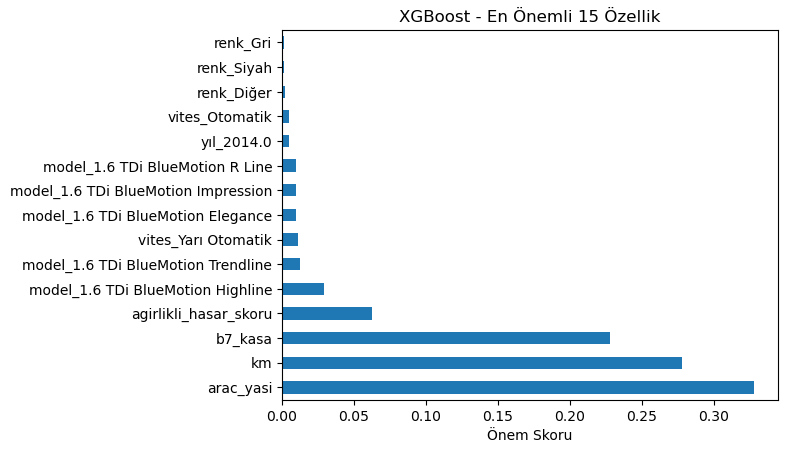

In [171]:
# GBoost ile en önemli 15 özelliği görselleştir
importances_gb = best_gb_model.feature_importances_
features_gb = pd.Series(importances_gb, index=X_train.columns)
features_gb.sort_values(ascending=False).head(15).plot(kind="barh")
plt.title("XGBoost - En Önemli 15 Özellik")
plt.xlabel("Önem Skoru")
plt.show()

In [172]:

estimators = [
    ('lr', lr), # Lineer regresyonu da katabiliriz
    ('rf', best_rf),
    ('gb', best_gb_model),
    ('xgb', best_xgb_model) 
]

voting_regressor = VotingRegressor(estimators=estimators, n_jobs=-1)
voting_regressor.fit(X_train, y_train)

y_pred_voting = voting_regressor.predict(X_test)
mse_voting = mean_squared_error(y_test, y_pred_voting)
r2_voting = r2_score(y_test, y_pred_voting)
print(f"\nVoting Regressor: Test MSE = {mse_voting:.4f}, Test R2 = {r2_voting:.4f}")


Voting Regressor: Test MSE = 0.0068, Test R2 = 0.9047



Random Forest Özellik Önem Dereceleri:
                                Feature  Importance
0                                    km    0.299235
9                             arac_yasi    0.286690
10                              b7_kasa    0.250723
32                agirlikli_hasar_skoru    0.062611
5     model_1.6 TDi BlueMotion Highline    0.025025
3     model_1.6 TDi BlueMotion Elegance    0.008476
21                  vites_Yarı Otomatik    0.007850
8    model_1.6 TDi BlueMotion Trendline    0.007138
7       model_1.6 TDi BlueMotion R Line    0.006832
6   model_1.6 TDi BlueMotion Impression    0.004849


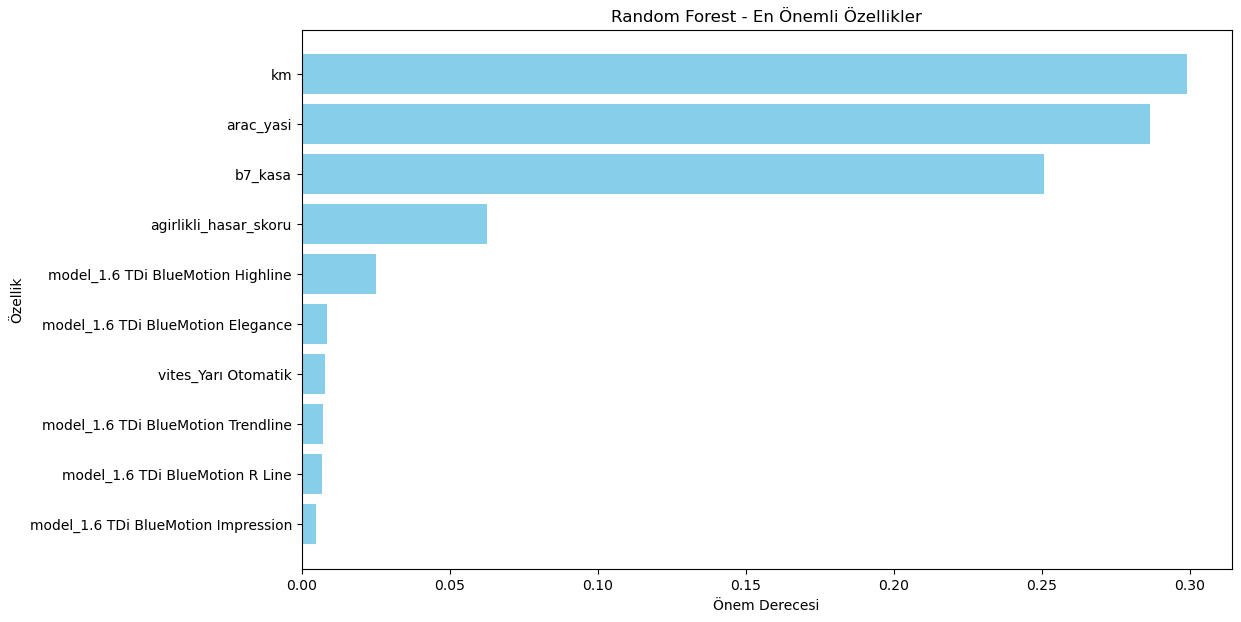


Gradient Boosting Özellik Önem Dereceleri:
                                Feature  Importance
9                             arac_yasi    0.328340
0                                    km    0.278115
10                              b7_kasa    0.228034
32                agirlikli_hasar_skoru    0.062205
5     model_1.6 TDi BlueMotion Highline    0.029308
8    model_1.6 TDi BlueMotion Trendline    0.012345
21                  vites_Yarı Otomatik    0.011174
3     model_1.6 TDi BlueMotion Elegance    0.009925
6   model_1.6 TDi BlueMotion Impression    0.009872
7       model_1.6 TDi BlueMotion R Line    0.009665


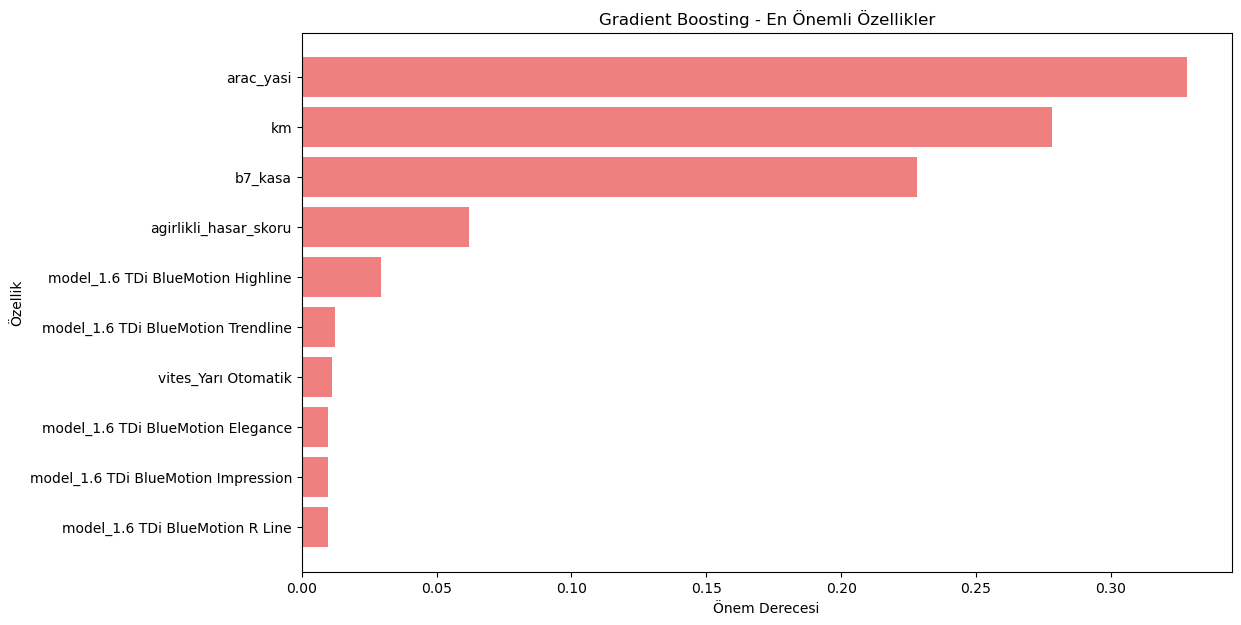

In [173]:


# Random Forest modelinden özellik önemlerini alalım
# best_rf, GridSearchCV ile optimize edilmiş Random Forest modeliniz
feature_importances_rf = best_rf.feature_importances_
feature_names = X.columns # X, özellik sütunlarınızın olduğu DataFrame

# Önem derecelerini bir DataFrame'e dönüştür ve sırala
features_df_rf = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances_rf
}).sort_values(by='Importance', ascending=False)

print("\nRandom Forest Özellik Önem Dereceleri:")
print(features_df_rf.head(10)) # İlk 10 önemli özelliği göster

# Görselleştirme
plt.figure(figsize=(12, 7))
plt.barh(features_df_rf['Feature'].head(10), features_df_rf['Importance'].head(10), color='skyblue')
plt.xlabel("Önem Derecesi")
plt.ylabel("Özellik")
plt.title("Random Forest - En Önemli Özellikler")
plt.gca().invert_yaxis() # En önemli özelliği yukarıda göstermek için
plt.show()

# Gradient Boosting için de benzer analizi yapabiliriz
feature_importances_gb = best_gb_model.feature_importances_
features_df_gb = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances_gb
}).sort_values(by='Importance', ascending=False)

print("\nGradient Boosting Özellik Önem Dereceleri:")
print(features_df_gb.head(10))

plt.figure(figsize=(12, 7))
plt.barh(features_df_gb['Feature'].head(10), features_df_gb['Importance'].head(10), color='lightcoral')
plt.xlabel("Önem Derecesi")
plt.ylabel("Özellik")
plt.title("Gradient Boosting - En Önemli Özellikler")
plt.gca().invert_yaxis()
plt.show()

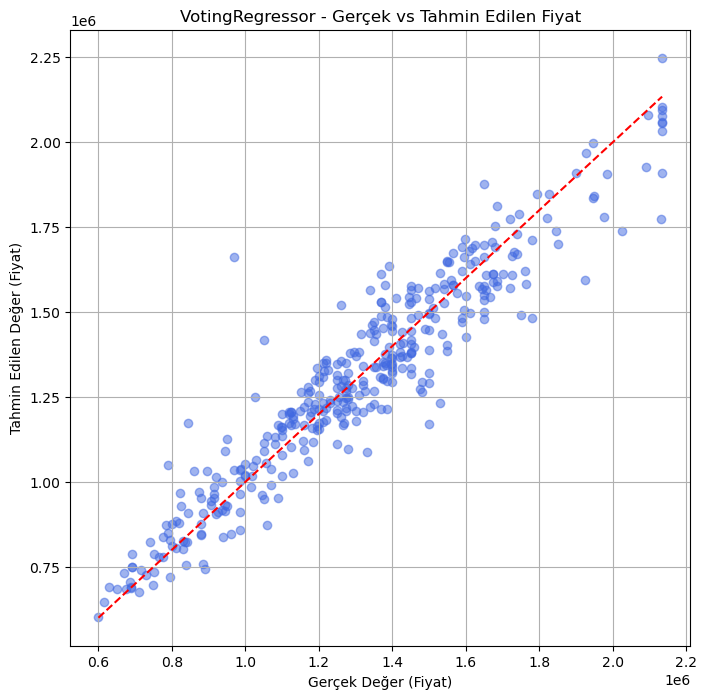

In [174]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
plt.scatter(np.exp(y_test), np.exp(y_pred_voting), alpha=0.5, color='royalblue')
plt.plot([np.exp(y_test).min(), np.exp(y_test).max()], [np.exp(y_test).min(), np.exp(y_test).max()], 'r--')
plt.xlabel("Gerçek Değer (Fiyat)")
plt.ylabel("Tahmin Edilen Değer (Fiyat)")
plt.title("VotingRegressor - Gerçek vs Tahmin Edilen Fiyat")
plt.grid(True)
plt.show()

TEST VERİSİNDEKİ BAŞARI ORANIMIZ %90